Single Sample t-test

In [1]:
#Import Packages 
import pandas as pd 
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
pokemon = pd.read_csv("../Data/300k.csv", low_memory=False)
pokemon

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,False,19
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,False,13
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,False,16
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,False,19


Data Wrangling 

In [3]:
def city (series):
    if series == "Adelaide":
        return 0
    if series == "Amman":
        return 1 
    if series == "Amsterdam":
        return 2 
    if series == "Athens":
        return 3
    if series == "Auckland":
        return 4 
    if series == "Bahai":
        return 5 
    if series == "Bangkok":
        return 6
    if series == "Belem":
        return 7
    if series == "Berlin":
        return 8
    if series == "Bogota":
        return 9 
    if series == "Boise":
        return 10
    if series == "Bratislava":
        return 11 
    if series == "Bribane":
        return 12 
    if series == "Brunie":
        return 13
    if series == "Bussels":
        return 14
    if series == "Bucharest":
        return 15
    if series == "Buenos_Aires":
        return 16
    if series == "Cairo":
        return 17 
    if series == "Casablanca":
        return 18
    if series == "Chicago":
        return 19
    if series == "Copenhagen":
        return 20
    if series == "Cordoba":
        return 21
    if series == "Costa_Rica":
        return 22 
    if series == "Damascus":
        return 23
    if series == "Denver":
        return 24 
    if series == "Detroit":
        return 25 
    if series == "Dubia":
        return 26
    if series == "Dublin":
        return 27 
    if series == "Edmonton":
        return 28
    if series == "Fortaleza":
        return 29 
    if series == "Guam":
        return 30 
    if series == "Guayaquil":
        return 31
    if series == "Guyana":
        return 32
    if series == "Halifax":
        return 33 
    if series == "Helsinki":
        return 34 
    if series == "Ho_Chi_Minh":
        return 35
    if series == "Hobart":
        return 36
    if series == "Hong_Kong":
        return 37
    if series == "Honolulu":
        return 38
    if series == "Indianapolis":
        return 39
    if series == "Isle_of_Man":
        return 40
    if series == "Istanbul":
        return 41
    if series == "Jakarta":
        return 42
    if series == "Jerusalem":
        return 43
    if series == "Karachi":
        return 44
    if series == "Kiev":
        return 45 
    if series == "Kolkata":
        return 46
    if series == "Kuala_Lumpur":
        return 47
    if series == "Kuching":
        return 48
    if series == "Lisbon":
        return 49
    if series == "Ljubljana":
        return 50
    if series == "London":
        return 51
    if series == "Los_Angeles":
        return 52
    if series == "Louisville":
        return 53
    if series == "Luanda":
        return 54
    if series == "Luxembourg":
        return 56
    if series == "Madrid":
        return 57
    if series == "Manila":
        return 58
    if series == "Melbourne":
        return 59
    if series == "Monrovia":
        return 60
    if series == "Mexico_City":
        return 61
    if series == "Monterrey":
        return 62
    if series == "Montreal":
        return 63
    if series == "Moscow":
        return 64
    if series == "New_York":
        return 65
    if series == "Olso":
        return 66
    if series == "Nicosia":
        return 67
    if series == "Narobi":
        return 68
    if series == "Noumea":
        return 69
    if series == "Paris":
        return 70
    if series == "Perth":
        return 71
    if series == "Phnom_Penh":
        return 72
    if series == "Phoenix":
        return 73
    if series == "Prague":
        return 74
    if series == "Puerto_Rico":
        return 75
    if series == "Regina":
        return 76
    if series == "Reykjavik":
        return 77
    if series == "Rome":
        return 78
    if series == "Santiago":
        return 79
    if series == "Sao_Paulo":
        return 80
    if series == "Sarajevo":
        return 81
    if series == "Singapore":
        return 82
    if series == "Stockholm":
        return 83 
    if series == "Sydney":
        return 84
    if series == "Tahiti":
        return 85
    if series == "Taipei":
        return 86
    if series == "Tokyo":
        return 87
    if series == "Toronto":
        return 88
    if series == "Tripoli":
        return 89
    if series == "Tunis":
        return 90
    if series == "Vancouver":
        return 91
    if series == "Vienna":
        return 92
    if series == "Vilnius":
        return 93
    if series == "Warsaw":
        return 94
    if series == "Winnipeg":
        return 95
    if series == "Zagreb":
        return 96
    if series == "Zurich":
        return 97

In [4]:
pokemon['cityR'] = pokemon['city'].apply(city)
pokemon

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,cityR
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,16,61.0
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,133,61.0
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,16,65.0
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,13,52.0
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,133,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,19,65.0
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,13,97.0
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,16,19.0
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,19,19.0


Pokemon appear by city 

<AxesSubplot:>

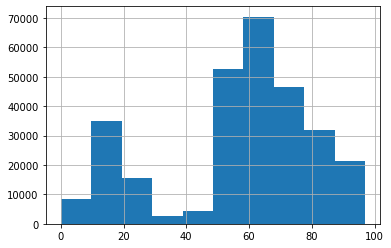

In [5]:
pokemon['cityR'].hist()

Test for Normality 

In [12]:
#Single Sample t-test
stats.ttest_1samp(pokemon['cityR'], 25000)

Ttest_1sampResult(statistic=nan, pvalue=nan)

Pokemon appear by class 

<AxesSubplot:>

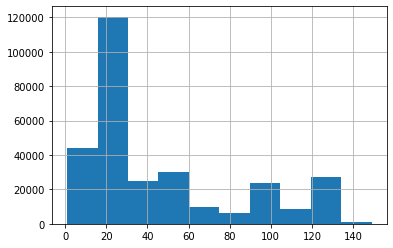

In [8]:
pokemon['class'].hist()

Test for Normality 

In [13]:
#Single sample t-test
stats.ttest_1samp(pokemon['class'], 25000)

Ttest_1sampResult(statistic=-342827.0256986259, pvalue=0.0)

Pokemon appear by Id

<AxesSubplot:>

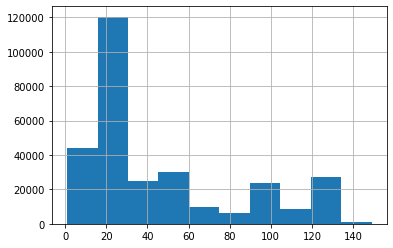

In [10]:
pokemon['pokemonId'].hist()

Test for Normality 

In [14]:
#Single Sample t-test
stats.ttest_1samp(pokemon['pokemonId'], 25000)

Ttest_1sampResult(statistic=-342827.0256986259, pvalue=0.0)

Independent t-test

In [15]:
#import packages 
from scipy.stats import ttest_ind

<AxesSubplot:>

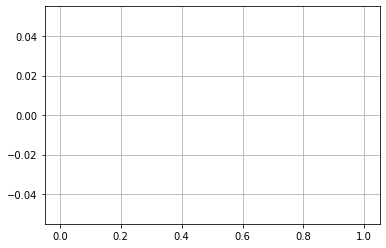

In [22]:
pokemon.cityR[pokemon.pokemonId == '16'].hist()